# Project Code File

In [14]:
import pandas as pd

In [2]:
import numpy as np

# step 1 : importing Data into the jupyter notebook and get to know about  the data  and data variables.


In [3]:
from catboost import CatBoostRegressor 

In [5]:
3ctrain = pd.read_csv("C:/coursera/INTERNSHALA/train.csv")
ctest = pd.read_csv("C:/coursera/INTERNSHALA/test.csv")

In [6]:
ctrain.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
target                                int64
dtype: object

In [7]:
ctest.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
dtype: object

In [ ]:
ctrain.head()
ctest.corr()

 # ON Reading the correlation variable, we found that no two data features are perfectly correlated, if we don't require to experiment with perfectly correlated variables

In [10]:
ctest.head()

id  perc_premium_paid_by_cash_credit  age_in_days  Income  \
0    649                             0.001        27384   51150   
1  81136                             0.124        23735  285140   
2  70762                             1.000        17170  186030   
3  53935                             0.198        16068  123540   
4  15476                             0.041        10591  200020   

   Count_3-6_months_late  Count_6-12_months_late  \
0                    0.0                     0.0   
1                    0.0                     0.0   
2                    0.0                     0.0   
3                    0.0                     0.0   
4                    1.0                     0.0   

   Count_more_than_12_months_late  application_underwriting_score  \
0                             0.0                           99.89   
1                             0.0                           98.93   
2                             0.0                             NaN   
3                             0.0                           99.00   
4                             0.0                           99.17   

   no_of_premiums_paid sourcing_channel residence_area_type  
0                    7                A               Rural  
1                   19                A               Urban  
2                    2                B               Urban  
3                   11                B               Rural  
4                   14                A               Rural

# step 2 : Data cleaning and removing outliers and null values if required
# Here we don't need to require outliners because outliners are by them special case of people are one of major focus in the data


In [18]:
import matplotlib.pyplot as plt

In [19]:
import seaborn as sns
nulls = ctrain.isnull().sum()
nulls[nulls > 0]

Count_3-6_months_late               97
Count_6-12_months_late              97
Count_more_than_12_months_late      97
application_underwriting_score    2974
dtype: int64

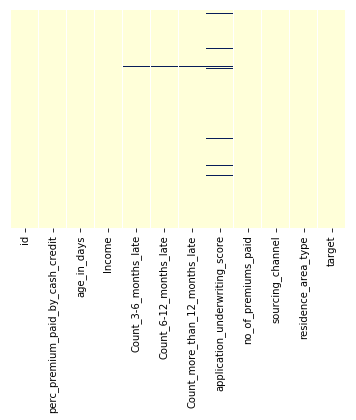

In [20]:
sns.heatmap(ctrain.isnull(),yticklabels=False, cbar=False,cmap='YlGnBu')

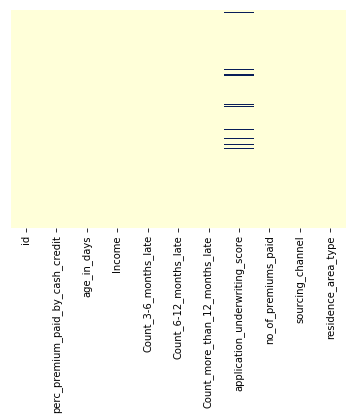

In [10]:
sns.heatmap(ctest.isnull(),yticklabels=False, cbar=False,cmap='YlGnBu')

In [27]:
ctrain['Count_3-6_months_late'].fillna(0,inplace=True)

In [29]:
ctrain['Count_6-12_months_late'].fillna(0,inplace=True)

ctrain['Count_more_than_12_months_late'].fillna(0,inplace=True)


In [30]:
ctrain['application_underwriting_score'].fillna(ctrain['application_underwriting_score'].mean(),inplace=True)

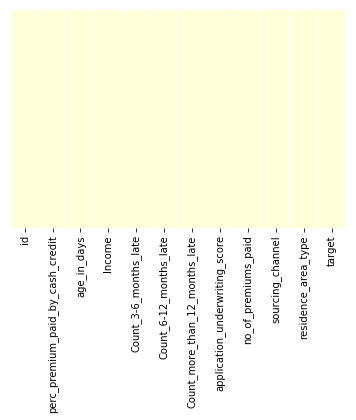

In [26]:
sns.heatmap(ctrain.isnull(),yticklabels=False, cbar=False,cmap='YlGnBu')

In [31]:
import seaborn as sns
nulls = ctest.isnull().sum()
nulls[nulls > 0]

Count_3-6_months_late               31
Count_6-12_months_late              31
Count_more_than_12_months_late      31
application_underwriting_score    1323
dtype: int64

In [40]:
ctest['Count_more_than_12_months_late'].fillna(0,inplace=True)

In [41]:
ctest['Count_6-12_months_late'].fillna(0,inplace=True)

In [43]:
ctest['Count_more_than_12_months_late'].fillna(0,inplace=True)
ctest['application_underwriting_score'].fillna(ctest['application_underwriting_score'].mean(),inplace=True)

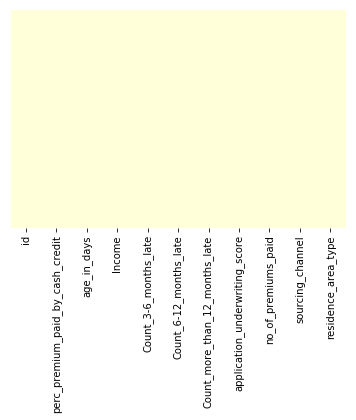

In [45]:
sns.heatmap(ctest.isnull(),yticklabels=False, cbar=False,cmap='YlGnBu')

# step 3: Model Selection and Model fitting
## Here ,We now fit the model , Here we know our output variable and we should use a supervised learning model but the output variable is contiuous in nature so we should use regression model instead of classfication model. But the model has categorial variables which is best supported by cat boost library by yandex

In [46]:
from catboost import CatBoostRegressor


In [47]:
y1 = pd.DataFrame()

In [48]:
y2 = pd.DataFrame()

In [49]:
y1['id']=ctrain['id']

In [50]:
y1['target']=ctrain['target']

In [51]:
y2['id']=ctest['id']

In [52]:
y2['target']=0
ctrain  =ctrain.drop(['target'],axis=1)


In [53]:
y1.head()
ctrain  =ctrain.drop(['id'],axis=1)



In [54]:
y2.head()
ctest  =ctest.drop(['id'],axis=1)

In [55]:
model = CatBoostRegressor(iterations=50,depth=3,learning_rate=0.1,loss_function='RMSE')

In [56]:
model.fit(ctrain,y1['target'],cat_features=np.where(ctrain.dtypes != np.float)[0],eval_set=(ctrain,y1['target']),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.2390674	test: 0.2390674	best: 0.2390674 (0)	total: 457ms	remaining: 22.4s
1:	learn: 0.2364848	test: 0.2364848	best: 0.2364848 (1)	total: 536ms	remaining: 12.9s
2:	learn: 0.2342760	test: 0.2342760	best: 0.2342760 (2)	total: 609ms	remaining: 9.54s
3:	learn: 0.2324563	test: 0.2324563	best: 0.2324563 (3)	total: 768ms	remaining: 8.83s
4:	learn: 0.2309042	test: 0.2309042	best: 0.2309042 (4)	total: 929ms	remaining: 8.36s
5:	learn: 0.2296350	test: 0.2296350	best: 0.2296350 (5)	total: 1.06s	remaining: 7.78s
6:	learn: 0.2285141	test: 0.2285141	best: 0.2285141 (6)	total: 1.22s	remaining: 7.52s
7:	learn: 0.2275083	test: 0.2275083	best: 0.2275083 (7)	total: 1.34s	remaining: 7.05s
8:	learn: 0.2266891	test: 0.2266891	best: 0.2266891 (8)	total: 1.44s	remaining: 6.55s
9:	learn: 0.2260049	test: 0.2260049	best: 0.2260049 (9)	total: 1.52s	remaining: 6.09s
10:	learn: 0.2253826	test: 0.2253826	best: 0.2253826 (10)	total: 1.62s	remaining: 5.73s
11:	learn: 0.2248667	test: 0.2248667	best: 0.2248667

# step 4 : Predicting the model for the test set 

In [57]:
y1['target']=model.predict(ctrain)
ctest.head()

perc_premium_paid_by_cash_credit  age_in_days  Income  \
0                             0.001        27384   51150   
1                             0.124        23735  285140   
2                             1.000        17170  186030   
3                             0.198        16068  123540   
4                             0.041        10591  200020   

   Count_3-6_months_late  Count_6-12_months_late  \
0                    0.0                     0.0   
1                    0.0                     0.0   
2                    0.0                     0.0   
3                    0.0                     0.0   
4                    1.0                     0.0   

   Count_more_than_12_months_late  application_underwriting_score  \
0                             0.0                       99.890000   
1                             0.0                       98.930000   
2                             0.0                       99.061898   
3                             0.0                       99.000000   
4                             0.0                       99.170000   

   no_of_premiums_paid sourcing_channel residence_area_type  
0                    7                A               Rural  
1                   19                A               Urban  
2                    2                B               Urban  
3                   11                B               Rural  
4                   14                A               Rural

In [58]:
y2['target']=model.predict(ctest)

y1.head()

In [59]:
y1.head()

id    target
0  110936  0.969604
1   41492  0.983643
2   31300  0.352104
3   19415  0.988885
4   99379  0.987382

In [60]:
y2.head()

id    target
0    649  0.989284
1  81136  0.982517
2  70762  0.818590
3  53935  0.987058
4  15476  0.954102

# step 5 : Generating a Output file


In [63]:
y2.to_csv("C:/coursera/INTERNSHALA/output.csv", header=True, index=False) 

# step 6: sepreting potential defaulter

In [73]:
y2['Potential Defaulter'] = y2['target']>0.54

In [72]:
y2.head()

id    target  Defaulting potential
0    649  0.989284                  True
1  81136  0.982517                  True
2  70762  0.818590                  True
3  53935  0.987058                  True
4  15476  0.954102                  True